## IMPORT LIBS

In [1]:
import sys
sys.path.append('../../ASSETS/CLASS/')
import pandas as pd
from Viz import Viz
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## CREATE FUNCTIONS

In [27]:
stop_words = set(stopwords.words(['portuguese', 'english', 'spanish', 'french']))

def clean_comment(comment):
    # Supprimer les nan
    if str(comment).lower() == "nan":
        return ""

    # Convertir le texte en minuscules
    comment = comment.lower()

    # Supprimer la ponctuation
    comment = comment.translate(str.maketrans('', '', string.punctuation))

    # Supprimer les chiffres et autres caractères non alphabétiques
    comment = re.sub(r'[^a-zA-Z\s]', '', comment)

    # Supprimer les stop words
    comment = ' '.join([word for word in comment.split() if word not in stop_words])

    return comment

## OPEN DATASET

In [28]:
df = pd.read_csv('../../DATA/IN/olist_order_reviews_dataset.csv')
df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


## ANALYSE QUANTITATIVE ET QUALITATIVE DU DATASET

In [29]:
viz = Viz(df)
viz.data_sample(df)

Notre Dataset est composé de 100000 lignes et 7 attributs


,name,type,sample,nb_uniques,%_uniques,%_nulls
0,review_id,object,"['7bc2406110b926393aa56f80a40eba40', '80e641a1...",99173,99.17,0.00
1,order_id,object,"['73fc7af87114b39712e6da79b0a377eb', 'a548910a...",99441,99.44,0.00
2,review_score,int64,"[4, 5, 5, 5, 5]",5,0.00,0.00
3,review_comment_title,object,"[nan, nan, nan, nan, nan]",4601,4.60,88.28
4,review_comment_message,object,"[nan, nan, nan, 'Recebi bem antes do prazo est...",36922,36.92,58.25
5,review_creation_date,object,"['2018-01-18 00:00:00', '2018-03-10 00:00:00',...",637,0.64,0.00
6,review_answer_timestamp,object,"['2018-01-18 21:46:59', '2018-03-11 03:05:13',...",99010,99.01,0.00


## FILTRAGE DES REVIEWS INFERIEUR A 3

In [30]:
reviews_under_3 = df[df['review_score'] < 3]
reviews_under_3

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,NaN,Não gostei ! Comprei gato por lebre,2017-12-13 00:00:00,2017-12-16 07:14:07
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39
...,...,...,...,...,...,...,...
99959,6cf47345d15e054dd6df872e929bdb27,54e6829fe81bc86cf88b12e6d07ea298,1,NaN,NaN,2017-06-08 00:00:00,2017-06-08 22:52:39
99975,2ee221b28e5b6fceffac59487ed39348,f2d12dd37eaef72ed7b1186b2edefbcd,2,Foto enganosa,Foto muito diferente principalmente a graninha...,2018-03-28 00:00:00,2018-05-25 01:23:26
99978,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,NaN,Tive um problema na entrega em que o correio c...,2018-02-21 00:00:00,2018-02-23 11:43:12
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43


## NETTOYAGE DES COMMENTAIRES

In [31]:
# Appliquer la fonction clean_comment à chaque commentaire
reviews_under_3['cleaned_comment'] = reviews_under_3['review_comment_message'].astype(str).apply(clean_comment)
reviews_under_3

C:\Users\j.dupau\AppData\Local\Temp\ipykernel_22272\4183028567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_under_3['cleaned_comment'] = reviews_under_3['review_comment_message'].astype(str).apply(clean_comment)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,cleaned_comment
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37,
16,9314d6f9799f5bfba510cc7bcd468c01,0dacf04c5ad59fd5a0cc1faa07c34e39,2,NaN,"GOSTARIA DE SABER O QUE HOUVE, SEMPRE RECEBI E...",2018-01-18 00:00:00,2018-01-20 21:25:45,gostaria saber sempre recebi compra agora decp...
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00,2018-08-15 04:10:37,pssimo
29,2c5e27fc178bde7ac173c9c62c31b070,0ce9a24111d850192a933fcaab6fbad3,1,NaN,Não gostei ! Comprei gato por lebre,2017-12-13 00:00:00,2017-12-16 07:14:07,gostei comprei gato lebre
32,58044bca115705a48fe0e00a21390c54,68e55ca79d04a79f20d4bfc0146f4b66,1,NaN,Sempre compro pela Internet e a entrega ocorre...,2018-04-08 00:00:00,2018-04-09 12:22:39,sempre compro internet entrega ocorre prazo co...
...,...,...,...,...,...,...,...,...
99959,6cf47345d15e054dd6df872e929bdb27,54e6829fe81bc86cf88b12e6d07ea298,1,NaN,NaN,2017-06-08 00:00:00,2017-06-08 22:52:39,
99975,2ee221b28e5b6fceffac59487ed39348,f2d12dd37eaef72ed7b1186b2edefbcd,2,Foto enganosa,Foto muito diferente principalmente a graninha...,2018-03-28 00:00:00,2018-05-25 01:23:26,foto diferente principalmente graninha sinttic...
99978,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,NaN,Tive um problema na entrega em que o correio c...,2018-02-21 00:00:00,2018-02-23 11:43:12,problema entrega correio colocou site entregue...
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,NaN,Solicitei a compra de uma capa de retrovisor c...,2017-12-15 00:00:00,2017-12-16 01:29:43,solicitei compra capa retrovisor celtaprismame...


## AFFICHAGE D'UN NUAGE DE MOT LES PLUS RECURENTS

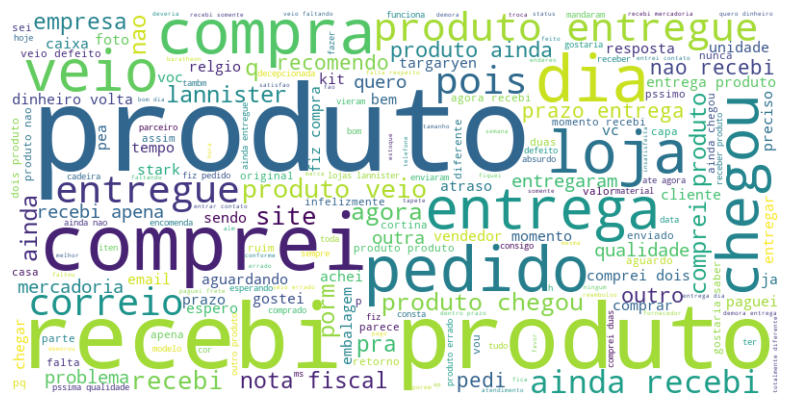

In [33]:
# Concaténer tous les commentaires nettoyés en une seule chaîne
all_comments = ' '.join(reviews_under_3['cleaned_comment'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', repeat=False).generate(all_comments)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## REVIEWS SUPERIEUR A 3

In [34]:
reviews_superior_3 = df[df['review_score'] > 3]
reviews_superior_3

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99993,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99994,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43


## NETTOYAGE DES COMMENTAIRES

In [37]:
# Appliquer la fonction clean_comment à chaque commentaire
reviews_superior_3['cleaned_comment'] = reviews_superior_3['review_comment_message'].astype(str).apply(clean_comment)
reviews_superior_3

C:\Users\j.dupau\AppData\Local\Temp\ipykernel_22272\2090290147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews_superior_3['cleaned_comment'] = reviews_superior_3['review_comment_message'].astype(str).apply(clean_comment)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,cleaned_comment
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,recebi bem prazo estipulado
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,parabns lojas lannister adorei comprar interne...
...,...,...,...,...,...,...,...,...
99993,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57,
99994,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,excelente mochila entrega super rpida super re...


## AFFICHAGE D'UN NUAGE DE MOT

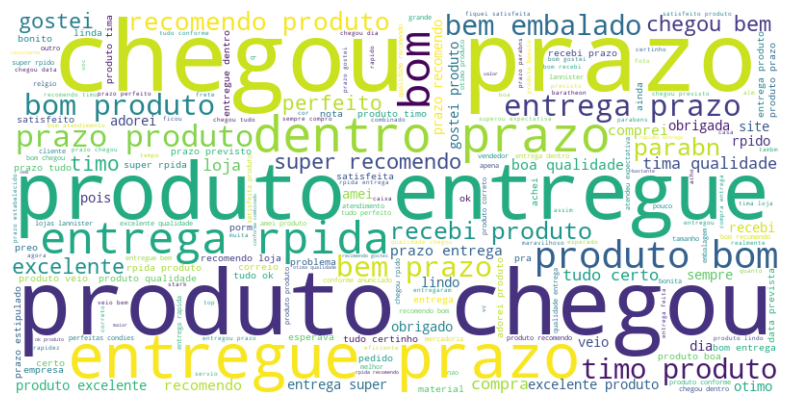

In [36]:
# Concaténer tous les commentaires nettoyés en une seule chaîne
all_comments = ' '.join(reviews_superior_3['cleaned_comment'])

# Créer le nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white', repeat=False).generate(all_comments)

# Afficher le nuage de mots
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()